<a href="https://colab.research.google.com/github/JunaidMovar/ML-DL-Learning/blob/master/IRIS_SOLUTION_WITH_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/JunaidMovar/ML-DL-Learning/master/Iris.csv'
data = pd.read_csv(url)

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#print(list(data))
names = ["Iris-setosa","Iris-virginica","Iris-versicolor"]
counts = []
for x in names:
    counts.append(data["Species"][data["Species"]==x].count())

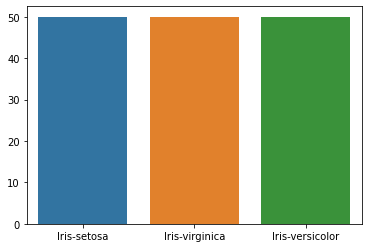

In [5]:
plt.figure()
sns.barplot(names,counts)
plt.show()

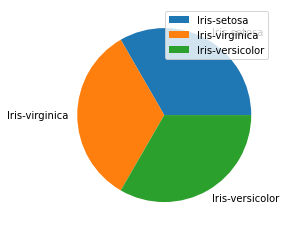

In [6]:
plt.figure()
plt.pie(counts,labels=names,)
plt.legend()
plt.show()

In [7]:
print(data["SepalLengthCm"])
print(data["SepalWidthCm"])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64


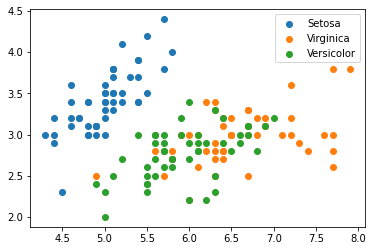

In [8]:
plt.figure()
plt.scatter(data["SepalLengthCm"][data["Species"]=="Iris-setosa"],data["SepalWidthCm"][data["Species"]=="Iris-setosa"],label='Setosa')
plt.scatter(data["SepalLengthCm"][data["Species"]=="Iris-virginica"],data["SepalWidthCm"][data["Species"]=="Iris-virginica"],label='Virginica')
plt.scatter(data["SepalLengthCm"][data["Species"]=="Iris-versicolor"],data["SepalWidthCm"][data["Species"]=="Iris-versicolor"],label='Versicolor')
plt.legend()
plt.show()

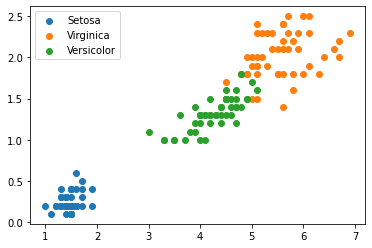

In [9]:
plt.figure()
plt.scatter(data["PetalLengthCm"][data["Species"]=="Iris-setosa"],data["PetalWidthCm"][data["Species"]=="Iris-setosa"],label='Setosa')
plt.scatter(data["PetalLengthCm"][data["Species"]=="Iris-virginica"],data["PetalWidthCm"][data["Species"]=="Iris-virginica"],label='Virginica')
plt.scatter(data["PetalLengthCm"][data["Species"]=="Iris-versicolor"],data["PetalWidthCm"][data["Species"]=="Iris-versicolor"],label='Versicolor')
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
Data_Array = np.array(data.values)
X = Data_Array[:,1:-1]
X = X.astype(np.float)
Y = Data_Array[:,-1]

encode = OneHotEncoder()
Y = encode.fit_transform(Y.reshape(-1,1)).toarray()
print(Y[0])
print(Y[51])
print(Y[101])

[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]


In [11]:
from sklearn.model_selection import train_test_split
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,random_state=10)
print(XTrain.shape,YTrain.shape,XTest.shape,YTest.shape)

(112, 4) (112, 3) (38, 4) (38, 3)


In [12]:
#Deep Learning Library Tensorflow 2.X
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import *

In [13]:
np.random.seed(8)
Model = Sequential([
    Dense(4,input_dim=4,activation='relu'),
    Dense(12,activation='relu'),
    Dense(6,activation='relu'),
    Dense(3,activation='softmax')
])

Model.compile(loss="categorical_crossentropy",optimizer=Adam(0.01),metrics=['accuracy'])
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [14]:
History = Model.fit(XTrain,YTrain,epochs=500,batch_size=50,use_multiprocessing=True,validation_data=(XTest,YTest),verbose=0)

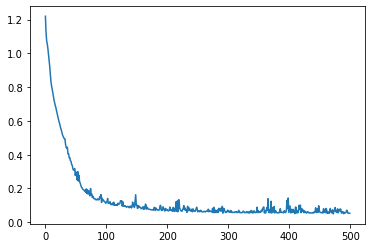

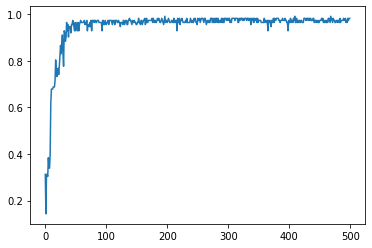

Final Loss Is  0.027409929782152176
Final Accuracy Is  1.0


In [15]:
import matplotlib.pyplot as pl
pl.figure()
pl.plot(History.history['loss'])
pl.show()
pl.plot(History.history['accuracy'])
pl.show()
Loss,Accuracy=Model.evaluate(XTest,YTest,verbose=0)
print("Final Loss Is ",Loss)
print("Final Accuracy Is ",Accuracy)

In [17]:
right,wrong = 0,0
for x in range(len(Y)):
    if Y[x].argmax(-1) == Model.predict(X[x].reshape(1,4)).argmax(-1)[0]:
        right+=1
    else:
        wrong+=1
print('Right Answers : ',right)
print('Wrong Answers : ',wrong)
print('Total Answers : ',right+wrong)  

Right Answers :  148
Wrong Answers :  2
Total Answers :  150
